In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
data = pd.read_csv("dataset.csv")
data.head()

,wall up,wall right,wall down,wall left,apple up,apple right,apple down,apple left,distance x,distance y,direction
0,200,400,200,400,0,0,0,0,288,-120,NaN
1,196,400,204,400,0,0,0,0,288,-116,0.0
2,192,400,208,400,0,0,0,0,288,-112,0.0
3,188,400,212,400,0,0,0,0,288,-108,0.0
4,184,400,216,400,0,0,0,0,288,-104,0.0


In [22]:
data = data.dropna()
data.isnull().sum()

,0
wall up,0
wall right,0
wall down,0
wall left,0
apple up,0
apple right,0
apple down,0
apple left,0
distance x,0
distance y,0


In [23]:

X = data[["wall up","wall right","wall down","wall left","apple up","apple right","apple down","apple left","distance x","distance y"]].values
Y = data[["direction"]].values

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1, random_state=4)
Y_one_hot_train = to_categorical(Y_train, num_classes=4)
Y_one_hot_test = to_categorical(Y_test, num_classes=4)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((26061, 10), (2896, 10), (26061, 1), (2896, 1))

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer="adam",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
result_train = model.fit(X_train , Y_one_hot_train , epochs=80)

Epoch 1/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7138 - loss: 7.3055
Epoch 2/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8828 - loss: 0.5653
Epoch 3/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9029 - loss: 0.4527
Epoch 4/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9126 - loss: 0.4165
Epoch 5/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9346 - loss: 0.3020
Epoch 6/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9337 - loss: 0.3055
Epoch 7/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9345 - loss: 0.2915
Epoch 8/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9495 - loss: 0.2289
Epoch 9/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9491 - loss: 0.2403
Epoch 10/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9617 - loss: 0.1854
Epoch 11/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9585 - loss: 0.2002
Epoch 12/80
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

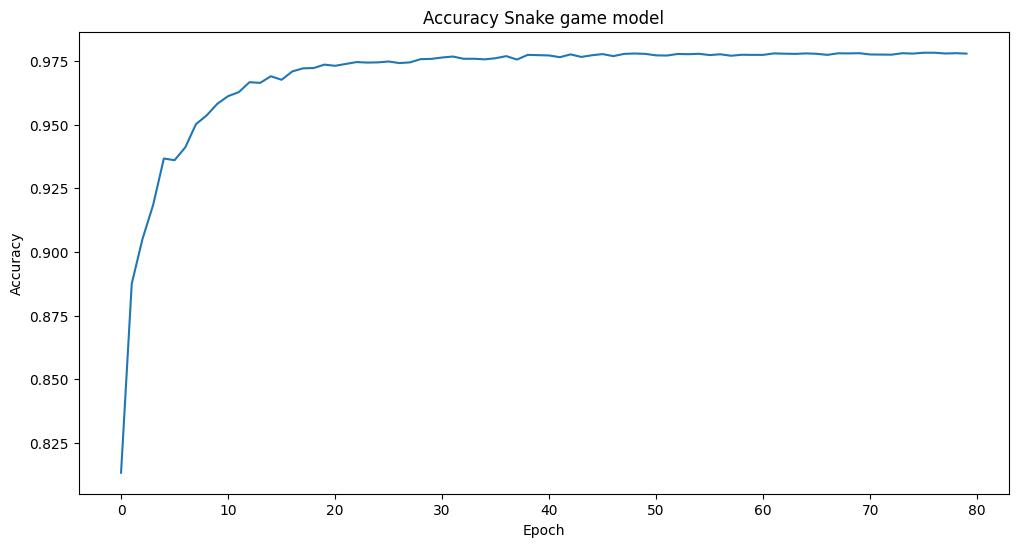

In [28]:
plt.figure(figsize=(12,6))
plt.plot(result_train.history["accuracy"])
plt.title("Accuracy Snake game model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

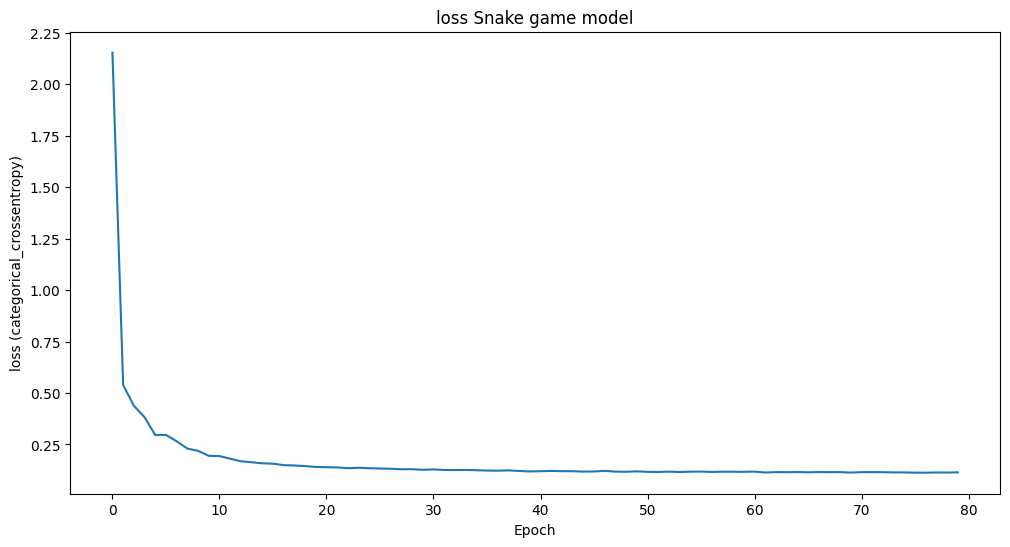

In [29]:

plt.figure(figsize=(12,6))
plt.plot(result_train.history["loss"])
plt.title("loss Snake game model")
plt.xlabel("Epoch")
plt.ylabel("loss (categorical_crossentropy)")
plt.show()

In [30]:
model.save("Snake_game_model_ML_ANN_Classification.h5")

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
Y_pred